In [2]:
# NN-Tools
import numpy as np
import keras

# Visualization
from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# Printing
from sympy import *
init_printing(use_latex=True)
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# Problem 1

In [3]:
# XOR data set
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
display(Matrix(X))
Y = np.array([0,1,1,0])
display(Matrix(Y))

⎡-1  -1⎤
⎢      ⎥
⎢-1  1 ⎥
⎢      ⎥
⎢1   -1⎥
⎢      ⎥
⎣1   1 ⎦

⎡0⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣0⎦

In [440]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()

# Here we make the hidden layer (size 3) with a ReLu
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dense(3,input_dim=2,activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Display the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 3)                 9         
_________________________________________________________________
dense_275 (Dense)            (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
None


In [441]:
# Train it!
history = model.fit(X, Y,
    batch_size=1,
    epochs=1000,
    verbose=0)

### 1.a

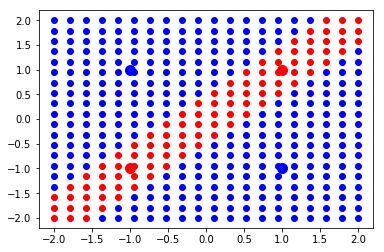

In [442]:
# Sample plot of classification space
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)

plt.show()

### 1.b

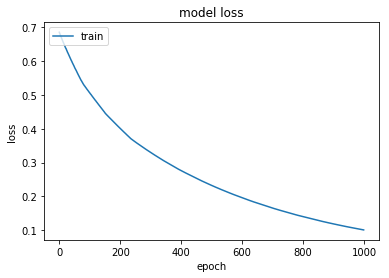

In [443]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 1.c

In [444]:
score = model.evaluate(X,Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.10091593116521835
Test accuracy: 1.0


# Problem 2

### In order to achieve a test accuracy of 100%, I had to use a multi layer network consisting of a input layer (size 2), a single hidden layer (size 3), and a output layer (size 1). The hidden layer uses the ReLU activation function with the output layer using the sigmoid activation function. With there only being two discrete targets, I use the binary cross-entropy error at the output layer. The optimizer used is Adam. I made this neural net work by working in 3 dimensions -- that is why the hidden layer is size 3.

# Problem 3

In [35]:
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()

# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.5
model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
                            bias_initializer=keras.initializers.Constant(0.5)))

# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(1,activation='sigmoid'))

# metrics = accuracy ( I want to evaluate accuracy )
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

# Display the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
# Train it!
history = model.fit(X, Y,
    batch_size=1,
    epochs=1000,
    verbose=0)

### 3.a

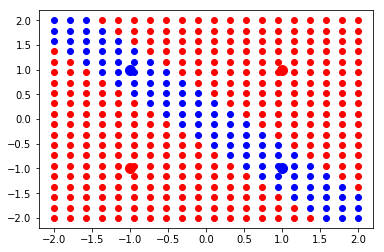

In [37]:
# Sample plot of classification space
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]

# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')

# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)

plt.show()

### 3.b

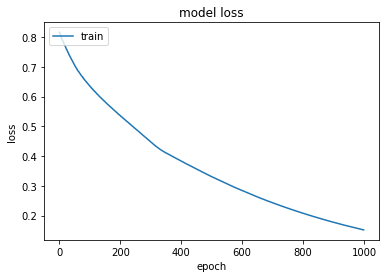

In [38]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### 3.c

In [39]:
score = model.evaluate(X,Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1515309363603592
Test accuracy: 1.0


# Problem 4

### Using Relu activation function makes your networks smaller in size because it can solve non linear problem (like xor) more efficiently. If you were to solve a non linear problem using tanh activation layers, you would likely need more tanh units to solve the problem or hope the network finds a way to solve it. After creating this network with tanh and relu, I have discovered this problem to be more reliably solved using relu with initializing the bias to 0.5; My assumption is the boundary was not in visible space of input vectors from the tutorial.

# Problem 5

In [296]:
from keras.datasets import mnist

# Digits are zero through nine, so 10 classes
num_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

# Data normalization (0-255 is encoded as 0-1 instead)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0
#x_test[x_test==0]=-1.0
#x_train[x_train==0]=-1.0


# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Shape information
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


In [297]:
print(y_train.shape)

(60000, 10)


In [386]:
model = keras.models.Sequential()
# Linear
model.add(keras.layers.Dense(500, activation='tanh',input_shape=[x_train.shape[1]])) #hidden layer (size 500)
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer="adam", #optimizer = adam
            metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_238 (Dense)            (None, 500)               392500    
_________________________________________________________________
dense_239 (Dense)            (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


### 5.a

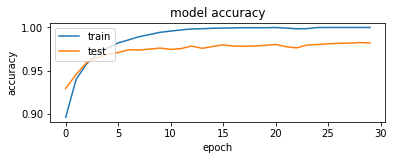

In [396]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### 5.b

In [387]:
# Train it!
history = model.fit(x_train, y_train,
        batch_size=128,
        epochs=30,
        verbose=0,
        validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.0791905496689662
Test accuracy: 0.9818


# Problem 6

In [434]:
model = keras.models.Sequential()
# Linear
model.add(keras.layers.Dense(500, activation='relu',
                                 input_shape=[x_train.shape[1]], bias_initializer=keras.initializers.Constant(0.1))) #hidden layer (size 250)
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
            optimizer="adam", #optimizer = adam
            metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_270 (Dense)            (None, 500)               392500    
_________________________________________________________________
dense_271 (Dense)            (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________


### 6.a

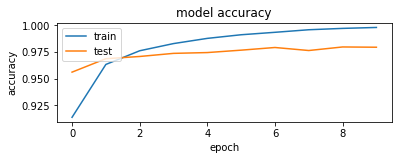

In [436]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

### 6.b

In [435]:
# Train it!
history = model.fit(x_train, y_train,
        batch_size=128,
        epochs=10,
        verbose=0,
        validation_split = 0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06804728050379781
Test accuracy: 0.981


# Problem 7

### The learning curves from both problems are very similar in that they both end up achieving roughly the same accuracy. However, they do vary by how quickly they learned. Using Relu, I was able to learn much faster than tanh. I was able to get to near the same accuracy as Tanh with Relu but with a third of the number of epochs. I believe this is related with the vanishing gradient that Tanh suffers from. Using Relu, I'm always passing back the maximum error thus improving the rate at which it learns as shown in the graph above.